Используя датасеты о продуктах и их продажах посчитайте корреляции:
* Пирсона
* Спирмена
* Мэтьюса
* Крамера

Ход работы:
* Прочтите данные о продажах и продуктах
* Соедините таблицы друг с другом по id продукта
* Посчитайте корреляцию Спирмена временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Посчитайте корреляцию Пирсона временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Найдите наиболее коррелирующий товар с American Chicken Hot Dogs по значению корреляции Спирмена и Пиарсона
* Постройте график зависимости продаж American Chicken Hot Dogs от найденного товара (scatterplot) и постройте два графика 1) зависимости продаж American Chicken Hot Dogs от времени 2) зависимости продаж найденного товара от времени (lineplot).
* Найдите корреляцию Мэтьюса между recyclable_package и low_fat
* Постройте гистограммы recyclable_package и low_fat.
* Найдите корреляцию Крамера между store_id и brand_name. Есть ли корреляция между этими признаками?
* Визуализируйте зависимость store_id и brand_name. Тут подумайте, как это можно сделать.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

* Прочтите данные о продажах и продуктах
* Соедините таблицы друг с другом по id продукта

In [3]:
products_df = pd.read_csv('foodmart.products.tsv', sep='\t')
sales_df = pd.read_csv('foodmart.sales.tsv', sep='\t')

df = pd.merge(products_df, sales_df, on='product_id')
df


,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,store_id,date,sales
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,7,1997-01-03,4
1,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,13,1997-01-11,3
2,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,17,1997-02-17,3
3,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,24,1997-03-15,3
4,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,7,1997-04-07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83386,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.3,20.2,18.8,16,1997-11-22,3
83387,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.3,20.2,18.8,6,1997-12-01,2
83388,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.3,20.2,18.8,16,1997-12-05,4
83389,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.3,20.2,18.8,7,1997-12-19,2


In [4]:
df.sort_values(by='date', inplace=True)
df

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,store_id,date,sales
66446,53,1247,Plato,Plato Extra Chunky Peanut Butter,16686033606,1.68,19.30,16.20,True,False,23,14,14.90,13.20,18.80,6,1997-01-01,3
64873,26,1217,Sphinx,Sphinx Muffins,34239718317,1.27,18.10,16.10,False,False,11,7,9.42,14.90,6.10,6,1997-01-01,2
62709,84,1175,Horatio,Horatio Mini Donuts,21113781332,1.73,7.57,6.57,True,False,23,8,13.40,18.10,8.04,14,1997-01-01,1
33461,19,627,Token,Token Diet Soda,73005771040,1.70,7.64,4.63,True,False,31,13,14.40,14.20,10.10,6,1997-01-01,2
52044,98,974,Just Right,Just Right Fancy Canned Sardines,26734393239,0.79,6.89,4.88,True,True,24,6,15.30,15.70,12.00,6,1997-01-01,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37920,64,713,Imagine,Imagine Frozen Pepperoni Pizza,23800389170,3.46,11.00,9.00,False,True,25,8,8.89,18.40,4.83,14,1997-12-30,1
28274,45,534,Fast,Fast Fudge Cookies,21590474247,3.38,12.60,10.60,False,True,26,5,4.69,5.39,9.71,14,1997-12-30,1
62246,45,1165,Horatio,Horatio Graham Crackers,13934881091,2.82,18.30,15.20,True,False,25,6,10.80,10.80,3.05,14,1997-12-30,2
44959,45,849,Nationeel,Nationeel Graham Crackers,99812476038,1.65,8.31,6.31,False,False,31,12,9.02,7.69,8.19,14,1997-12-30,2


* Посчитайте корреляцию Спирмена временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Посчитайте корреляцию Пирсона временного ряда продаж каждого продукта с каждым, используя соединенную таблицу

In [5]:
real_columns = ['SRP', 'gross_weight', 'net_weight', 'units_per_case', 'cases_per_pallet', 'shelf_width', 'shelf_height', 'shelf_depth', 'sales']


<Axes: >

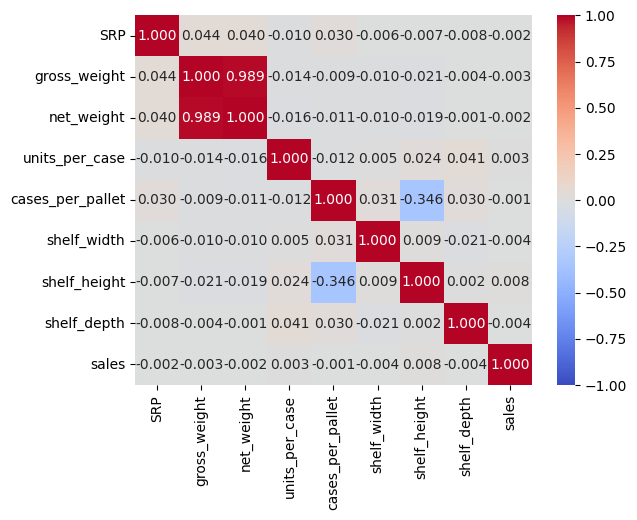

In [6]:
correlation_pearson = df[real_columns].corr('pearson')
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f")

<Axes: >

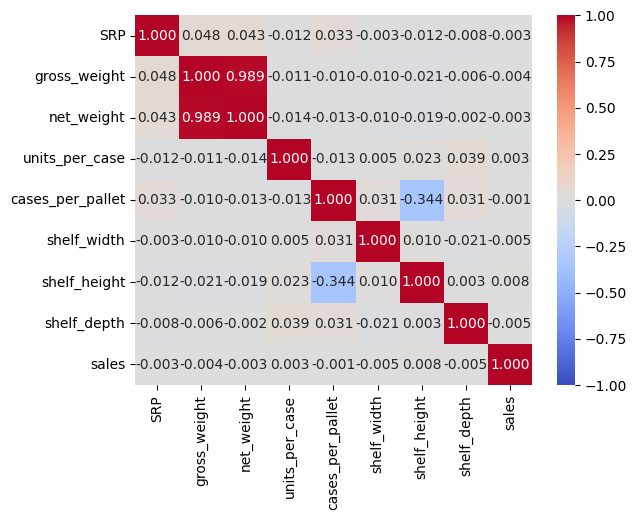

In [7]:
correlation_spearman = df[real_columns].corr(method='spearman')
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f")

In [8]:
# подсказка по пунктам 3 и 4.
sparse_sales = pd.pivot_table(df, values='sales', index=['date', 'store_id'],
                     columns=['product_name'], fill_value = 0)
# переход от смердженной таблицы к удобной таблице продаж
sparse_sales

product_name         ADJ Rosy Sunglasses  Akron City Map  \
date       store_id                                        
1997-01-01 6                         0.0             0.0   
           14                        0.0             0.0   
1997-01-02 11                        0.0             0.0   
           23                        0.0             0.0   
1997-01-03 7                         0.0             0.0   
...                                  ...             ...   
1997-12-28 13                        0.0             0.0   
           22                        0.0             0.0   
1997-12-29 6                         0.0             0.0   
           7                         0.0             0.0   
1997-12-30 14                        0.0             0.0   

product_name         Akron Eyeglass Screwdriver  American Beef Bologna  \
date       store_id                                                      
1997-01-01 6                                0.0                    0.0   
           14                               0.0                    0.0   
1997-01-02 11                               0.0                    0.0   
           23                               0.0                    0.0   
1997-01-03 7                                0.0                    0.0   
...                                         ...                    ...   
1997-12-28 13                               0.0                    0.0   
           22                               0.0                    0.0   
1997-12-29 6                                0.0                    0.0   
           7                                0.0                    0.0   
1997-12-30 14                               0.0                    0.0   

product_name         American Chicken Hot Dogs  American Cole Slaw  \
date       store_id                                                  
1997-01-01 6                               0.0                 0.0   
           14                              0.0                 0.0   
1997-01-02 11                              0.0                 0.0   
           23                              0.0                 0.0   
1997-01-03 7                               0.0                 0.0   
...                                        ...                 ...   
1997-12-28 13                              0.0                 0.0   
           22                              0.0                 0.0   
1997-12-29 6                               0.0                 0.0   
           7                               3.0                 0.0   
1997-12-30 14                              0.0                 0.0   

product_name         American Corned Beef  American Foot-Long Hot Dogs  \
date       store_id                                                      
1997-01-01 6                          0.0                          0.0   
           14                         0.0                          0.0   
1997-01-02 11                         0.0                          0.0   
           23                         0.0                          0.0   
1997-01-03 7                          0.0                          0.0   
...                                   ...                          ...   
1997-12-28 13                         4.0                          0.0   
           22                         0.0                          0.0   
1997-12-29 6                          0.0                          0.0   
           7                          0.0                          0.0   
1997-12-30 14                         0.0                          0.0   

product_name         American Low Fat Bologna  American Low Fat Cole Slaw  \
date       store_id                                                         
1997-01-01 6                              0.0                         0.0   
           14                             0.0                         0.0   
1997-01-02 11                             0.0                         0.0 

In [9]:
from scipy.stats.contingency import association # cramer
# confusion_matrix = pd.crosstab(label, x) # это ожидается на вход в методе выше, изучите документацию

from scipy.stats import pearsonr # pearson
from scipy.stats import  spearmanr # spearman
from sklearn.metrics import matthews_corrcoef # matthews

In [10]:
sparsed_correlation_pearson = sparse_sales.corr(method='pearson')
sparsed_correlation_spearman = sparse_sales.corr(method='spearman')

In [11]:
print(sparsed_correlation_pearson.shape)
print(sparsed_correlation_spearman.shape)

(1559, 1559)
(1559, 1559)


In [12]:
flatten_correlations_pearson = sparsed_correlation_pearson.values.flatten()
print(flatten_correlations_pearson.shape)

flatten_correlations_spearman = sparsed_correlation_spearman.values.flatten()


(2430481,)


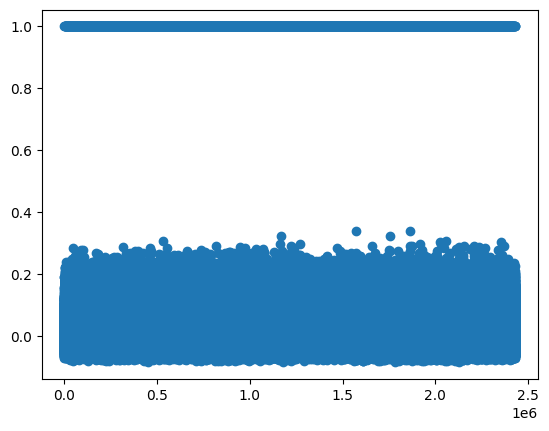

In [13]:
plt.scatter(range(len(flatten_correlations_pearson)), flatten_correlations_pearson);

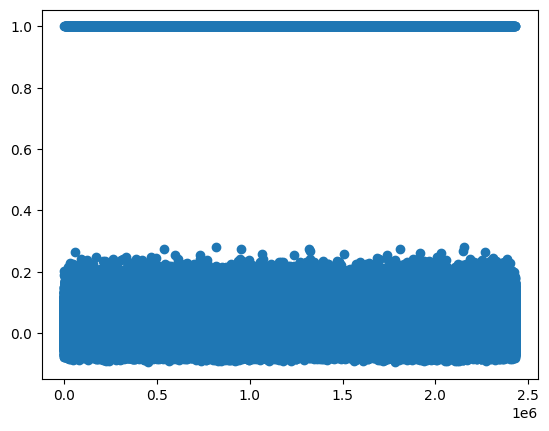

In [14]:
plt.scatter(range(len(flatten_correlations_spearman)), flatten_correlations_spearman);

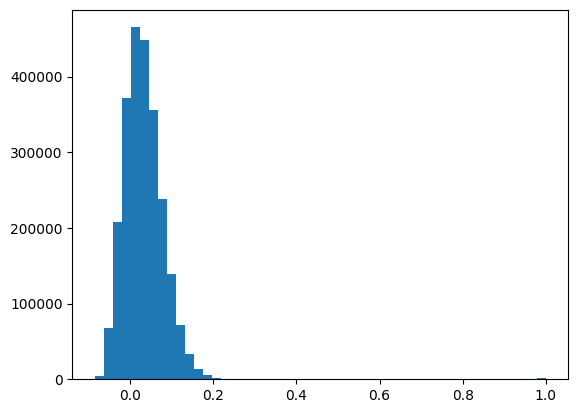

In [15]:
plt.hist(flatten_correlations_pearson, bins=50);

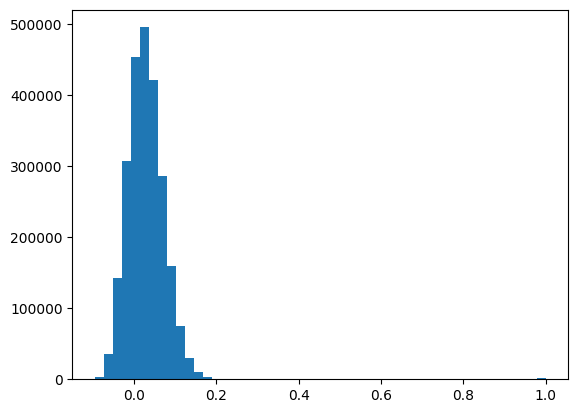

In [16]:
plt.hist(flatten_correlations_spearman, bins=50);

<Axes: >

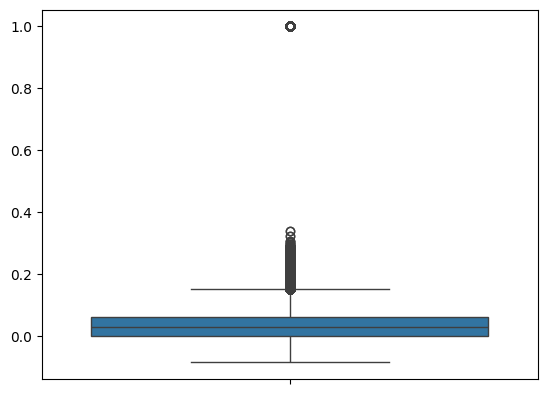

In [17]:
sns.boxplot(flatten_correlations_pearson)

<Axes: >

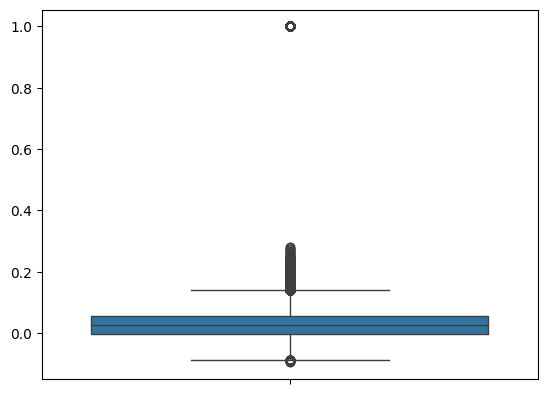

In [18]:
sns.boxplot(flatten_correlations_spearman)

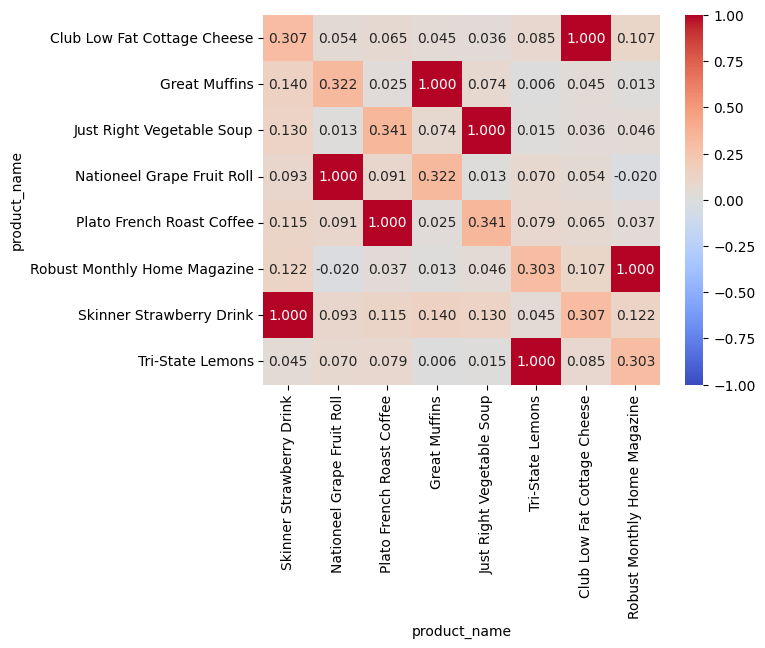

In [19]:
interesting_indices_pearson = np.where((abs(sparsed_correlation_pearson) > 0.3) & (sparsed_correlation_pearson < 0.99))
interesting_correlation_pearson = sparsed_correlation_pearson.iloc[interesting_indices_pearson]
sns.heatmap(interesting_correlation_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f");

* Найдите наиболее коррелирующий товар с American Chicken Hot Dogs по значению корреляции Спирмена и Пиарсона

In [27]:
sparsed_correlation_pearson['American Chicken Hot Dogs'].sort_values(ascending=False)

product_name
American Chicken Hot Dogs            1.000000
Mighty Good Monthly Home Magazine    0.240269
Big Time Frozen Chicken Wings        0.223398
Carlson Sour Cream                   0.220726
Great Cranberry Muffins              0.217509
                                       ...   
Kiwi Lox                            -0.057037
Plato Decaf Coffee                  -0.058481
PigTail Frozen Sausage Pizza        -0.058960
Fast Low Fat Chips                  -0.061037
Lake Pimento Loaf                   -0.065509
Name: American Chicken Hot Dogs, Length: 1559, dtype: float64

Тут видно, что у `Mighty Good Monthly Home Magazine` корреляция по Пирсону `0.240269` 

In [28]:
sparsed_correlation_spearman['American Chicken Hot Dogs'].sort_values(ascending=False)

product_name
American Chicken Hot Dogs       1.000000
Great Cranberry Muffins         0.198105
Plato Columbian Coffee          0.195568
Carlson Sour Cream              0.195231
Special Corn Puffs              0.180909
                                  ...   
Kiwi Lox                       -0.055971
Fast Low Fat Chips             -0.057055
Jeffers Wheat Puffs            -0.062363
PigTail Frozen Sausage Pizza   -0.065439
Lake Pimento Loaf              -0.071983
Name: American Chicken Hot Dogs, Length: 1559, dtype: float64

А по корреляции Спирмана выигрывает `Great Cranberry Muffins` с показателем в `0.198105`

* Постройте график зависимости продаж American Chicken Hot Dogs от найденного товара (scatterplot) и постройте два графика 1) зависимости продаж American Chicken Hot Dogs от времени 2) зависимости продаж найденного товара от времени (lineplot).

Text(0.5, 1.0, 'American Chicken Hot Dogs sales over time')

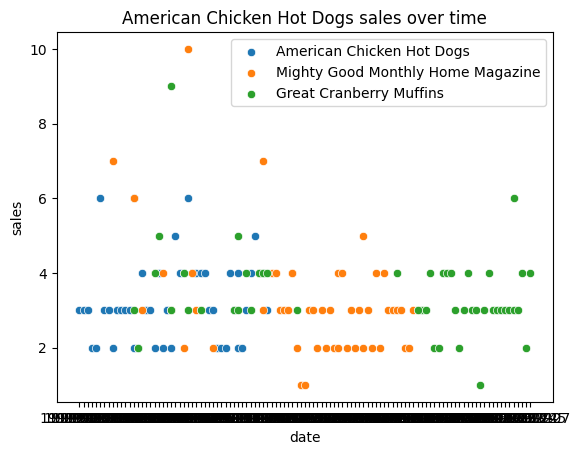

In [ ]:
american_chicken_hot_dogs = df[df['product_name'] == 'American Chicken Hot Dogs']
mighty_good_monthly_home_magazine = df[df['product_name'] == 'Mighty Good Monthly Home Magazine']
great_cranberry_muffins = df[df['product_name'] == 'Great Cranberry Muffins']
ax = sns.scatterplot(data=american_chicken_hot_dogs, x='date', y='sales', label='American Chicken Hot Dogs')
sns.scatterplot(data=mighty_good_monthly_home_magazine, x='date', y='sales', ax=ax, label='Mighty Good Monthly Home Magazine')
sns.scatterplot(data=great_cranberry_muffins, x='date', y='sales', ax=ax, label='Great Cranberry Muffins')
ax.set_title('American Chicken Hot Dogs sales over time')

* Найдите корреляцию Мэтьюса между recyclable_package и low_fat

In [58]:
matthews_corrcoef(df['recyclable_package'], df['low_fat'])

np.float64(-0.022364293265823097)

* Постройте гистограммы recyclable_package и low_fat.

<Axes: xlabel='recyclable_package', ylabel='Count'>

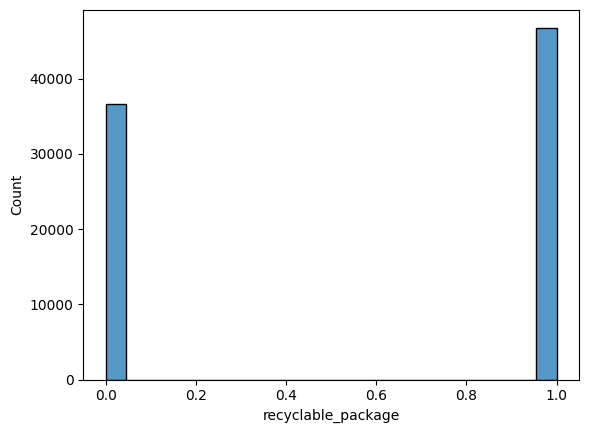

In [67]:
sns.histplot(data=df, x='recyclable_package')

<Axes: xlabel='low_fat', ylabel='Count'>

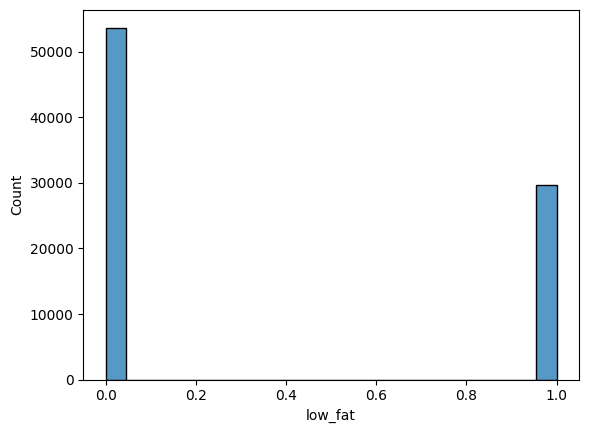

In [68]:
sns.histplot(data=df, x='low_fat')

* Найдите корреляцию Крамера между store_id и brand_name. Есть ли корреляция между этими признаками?


In [ ]:
from scipy.stats.contingency import association # cramer
# confusion_matrix = pd.crosstab(label, x) # это ожидается на вход в методе выше, изучите документацию

from scipy.stats import pearsonr # pearson
from scipy.stats import  spearmanr # spearman
from sklearn.metrics import matthews_corrcoef # matthews

In [77]:
crosstab = pd.crosstab(df['store_id'], df['brand_name'])
crosstab

brand_name,ADJ,Akron,American,Amigo,Applause,Atomic,BBB Best,Best,Best Choice,Better,...,Thresher,Tip Top,Token,Top Measure,Toretti,Toucan,Tri-State,Urban,Walrus,Washington
store_id,,,,,,,,,,,,,,,,,,,,,
2,2,3,17,1,3,5,25,2,39,19,...,4,0,13,4,0,2,27,1,6,8
3,4,13,71,11,13,50,159,13,151,123,...,42,7,69,34,1,16,214,29,43,45
6,8,9,61,12,6,28,141,19,132,73,...,32,9,59,30,4,8,172,24,40,47
7,7,12,74,6,10,49,171,15,163,105,...,36,6,55,39,5,6,215,27,42,53
11,9,15,70,14,12,47,147,18,183,136,...,43,6,55,40,6,10,216,27,39,49
13,6,18,119,13,14,60,218,23,262,173,...,72,14,76,57,9,20,347,45,52,82
14,1,0,13,1,4,7,25,6,35,27,...,8,0,13,7,1,2,29,5,4,9
15,4,10,64,18,11,40,160,19,150,119,...,41,14,46,34,5,13,192,25,31,43
16,3,7,71,10,8,39,141,21,139,94,...,37,7,59,31,6,10,187,20,40,48


In [78]:
association(crosstab, method='cramer')

0.0343024046787291

* Визуализируйте зависимость store_id и brand_name. Тут подумайте, как это можно сделать.

In [84]:
store_brand_df = df[['store_id', 'brand_name']].sort_values(by='store_id')
store_brand_df

,store_id,brand_name
38067,2,Imagine
47247,2,Discover
61956,2,Horatio
19446,2,Moms
19573,2,Moms
...,...,...
13020,24,Choice
57937,24,High Quality
17232,24,Better
44938,24,Nationeel


<Axes: xlabel='brand_name', ylabel='store_id'>

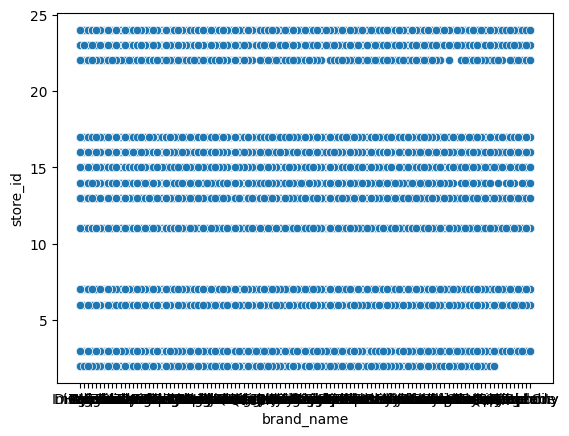

In [92]:
sns.scatterplot(data=store_brand_df, y='store_id', x='brand_name')